In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Acoustic_Extinguisher_Fire_Dataset.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 17442 rows and 7 columns.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    pre_df = df.copy()

    # Replace the spaces in the column names with underscores
    pre_df.columns = [s.replace(" ", "_") for s in pre_df.columns]

    # convert string columns to integers
    #pre_df["international_plan"] = pre_df["international_plan"].apply(lambda x: 0 if x=="no" else 1)
    #pre_df["voice_mail_plan"] = pre_df["voice_mail_plan"].apply(lambda x: 0 if x=="no" else 1)

    #Dropping unnecessary attribute
    #pre_df = pre_df.drop(["phone_number"], axis=1)

    #Converting string to categorical vaiable
    le = LabelEncoder()
    le.fit(pre_df['FUEL'])
    pre_df['FUEL'] = le.transform(pre_df['FUEL'])

    return pre_df

In [4]:
pre_df = preprocess_data(df)

pre_df.head(3)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1


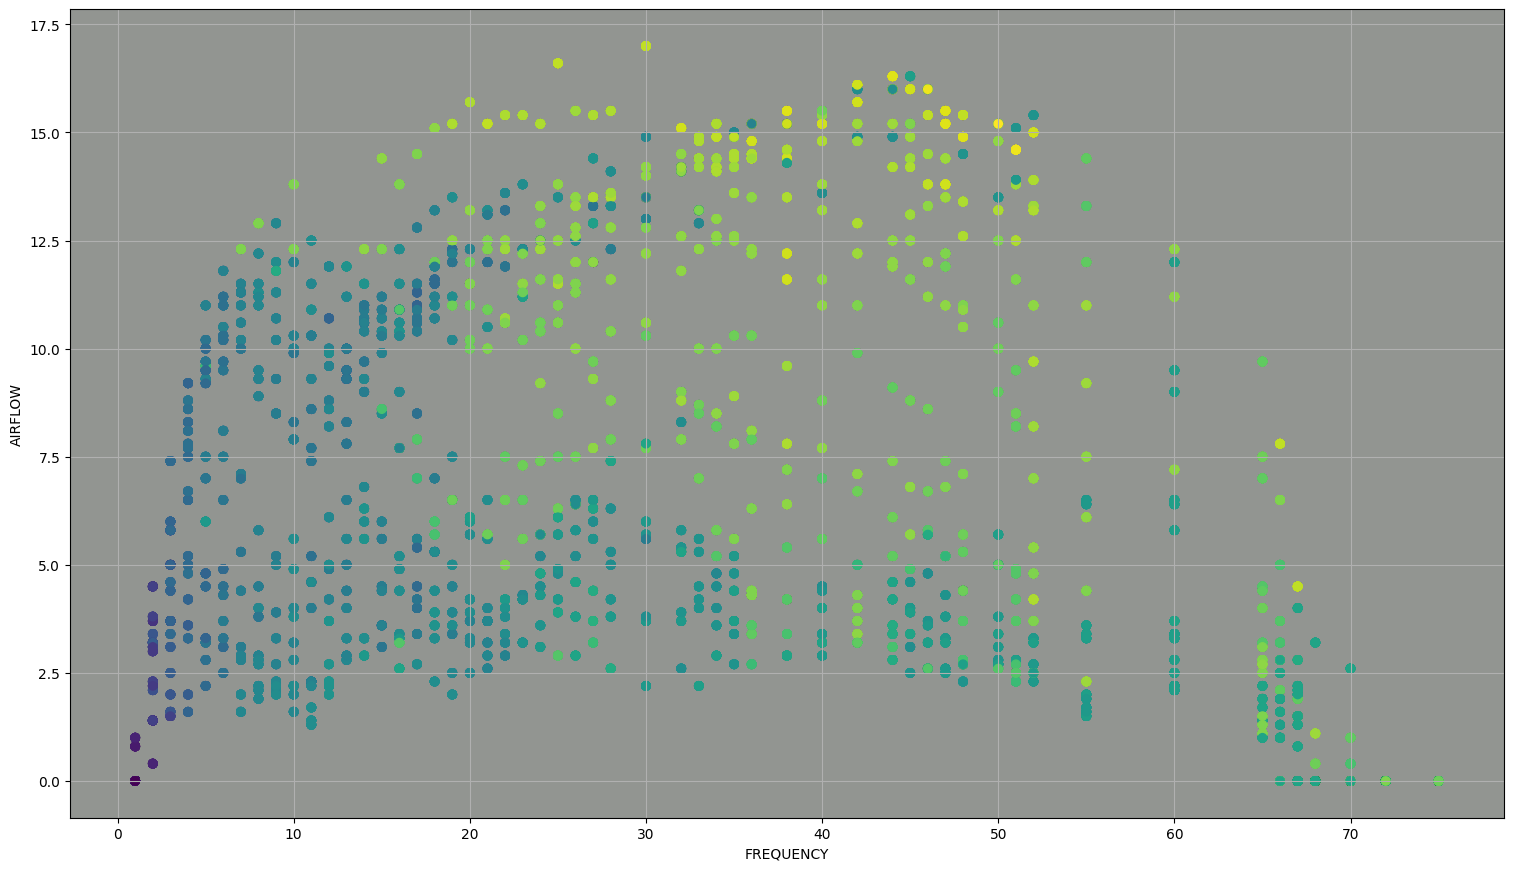

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.set_facecolor('xkcd:grey')
scatter = plt.scatter( df['FREQUENCY'],df['AIRFLOW'], c=df['DESIBEL'])
plt.xlabel('FREQUENCY')
plt.ylabel('AIRFLOW')
plt.grid(True)
plt.show()

In [6]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [7]:
#plot libaries
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook



layout = dict(
    yaxis=dict(
        title='AIRFLOW',
        automargin=True,
    ),
    xaxis=dict(
        title='FREQUENCY',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)
# Add traces

fig.add_trace(go.Scatter(x=df['FREQUENCY'], y=df['AIRFLOW'],text= df['DESIBEL'],
                    mode='markers',
                    name='DESIBEL',
                    hovertemplate="%{text}",
                    marker=dict(
                        size=8,
                        color = df['DESIBEL'],
                        colorscale='rainbow', # one of plotly colorscales
                        showscale=True
                    ))
            )
fig.update_layout(
    autosize=False,
    width=800,
    height=800
    )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [8]:
df2 = pd.DataFrame([[1, 1,102,20,29,6,99],[4, 5,1,100,102,36,44],[7, 1,1,1,13,46,55],[3,4,135,212,5,6,109]], columns=['SIZE','FUEL','DISTANCE','DESIBEL','AIRFLOW','FREQUENCY','STATUS'])

In [9]:
new_df = df.copy()
new_df=new_df.append(df2)

<ipython-input-9-5106121fda1c>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [10]:
#plot libaries
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook



layout = dict(
    yaxis=dict(
        title='AIRFLOW',
        automargin=True,
    ),
    xaxis=dict(
        title='FREQUENCY',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)
# Add traces

fig.add_trace(go.Scatter(x=new_df['FREQUENCY'], y=new_df['AIRFLOW'],text= new_df['DESIBEL'],
                    mode='markers',
                    name='DESIBEL',
                    hovertemplate="%{text}",
                    marker=dict(
                        size=8,
                        color = new_df['DESIBEL'],
                        colorscale='rainbow', # one of plotly colorscales
                        showscale=True
                    ))
            )
fig.update_layout(
    autosize=False,
    width=800,
    height=800
    )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [11]:
y = pre_df['DESIBEL']
X = pre_df.drop(columns=['DESIBEL'])

print("Data shape: ", X.shape)
print("Labels shape: ", y.shape)

Data shape:  (17442, 6)
Labels shape:  (17442,)


In [12]:
# Splittng train:test in 90:10 ratio

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13953, 6)
(13953,)
(3489, 6)
(3489,)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors

score = []

for n_neighbors in range(2,21):
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)
        score.append(clf.score(X,y))

score = np.reshape(score,(-1,2))

In [15]:
score

array([[0.97746818, 1.        ],
       [0.99420938, 1.        ],
       [0.97270955, 1.        ],
       [0.9628483 , 1.        ],
       [0.92649925, 1.        ],
       [0.93693384, 1.        ],
       [0.91153537, 1.        ],
       [0.90803807, 1.        ],
       [0.93418186, 1.        ],
       [0.91606467, 1.        ],
       [0.87037037, 1.        ],
       [0.89875014, 1.        ],
       [0.8918702 , 1.        ],
       [0.89032221, 1.        ],
       [0.85666781, 1.        ],
       [0.85110652, 1.        ],
       [0.8250774 , 1.        ],
       [0.85735581, 1.        ],
       [0.84072927, 1.        ]])

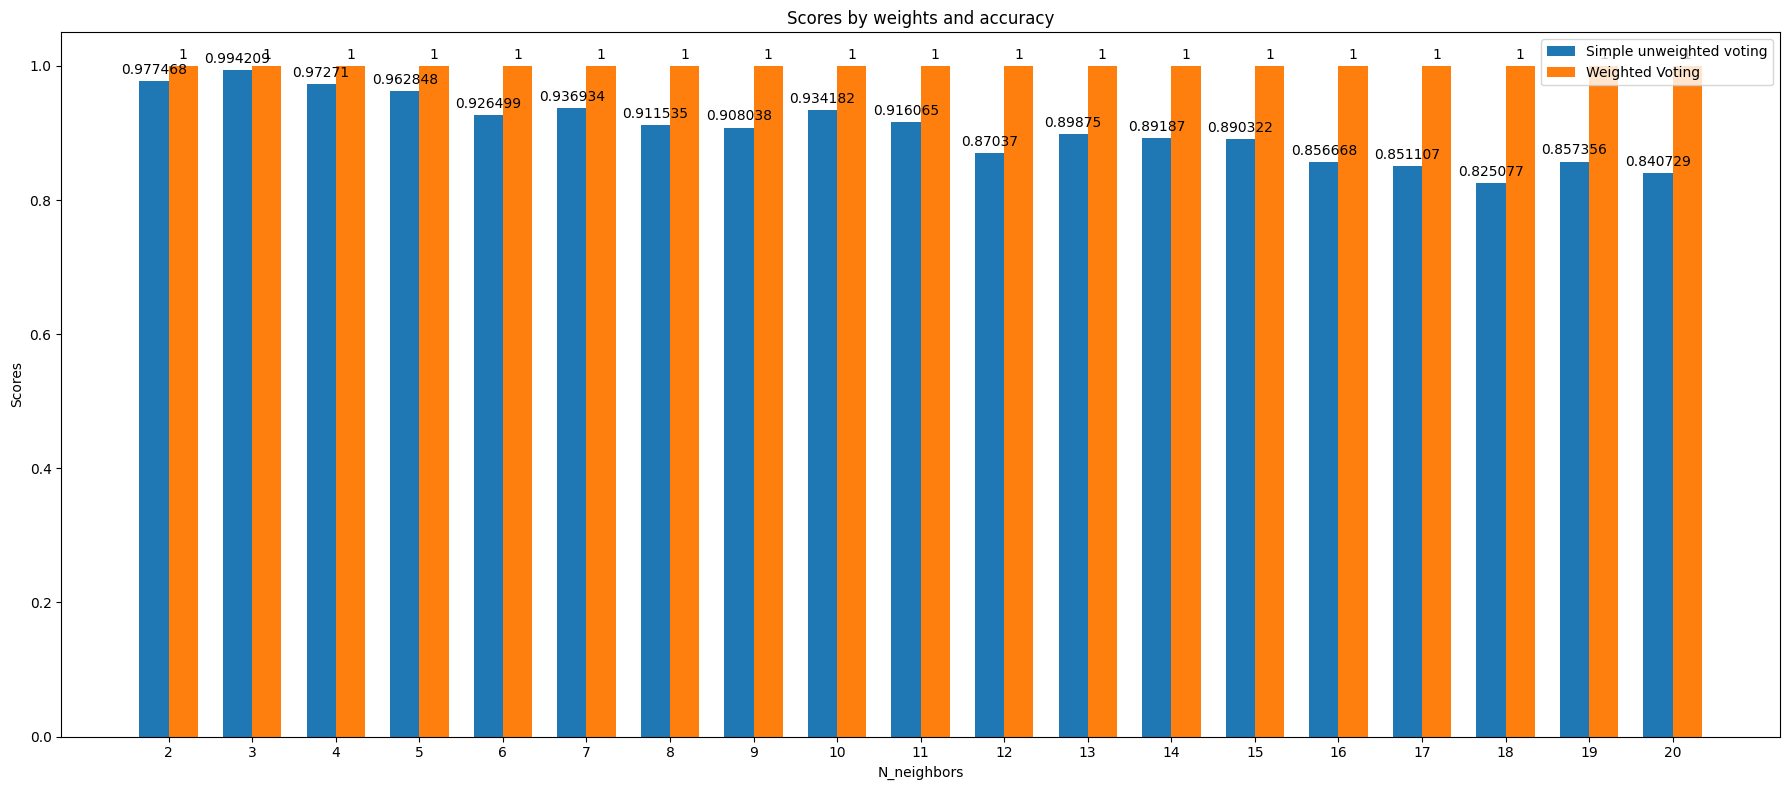

In [16]:
import matplotlib.pyplot as plt
import numpy as np


labels = np.arange(2, 21, 1)
uniform = score[:, 0::2].reshape(-1).tolist()
distance = score[:, 1::2].reshape(-1).tolist()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars



fig, ax = plt.subplots(figsize=(18,8))
rects1 = ax.bar(x - width/2, uniform, width, label='Simple unweighted voting')
rects2 = ax.bar(x + width/2, distance, width, label='Weighted Voting')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('N_neighbors')
ax.set_ylabel('Scores')
ax.set_title('Scores by weights and accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors

score = []

for n_neighbors in range(2,21):
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train, y_train)
        score.append(clf.score(X_test,y_test))

score = np.reshape(score,(-1,2))

In [18]:
score

array([[0.83720264, 0.91602178],
       [0.85640585, 0.8953855 ],
       [0.82430496, 0.86815707],
       [0.79163084, 0.82803095],
       [0.75723703, 0.82086558],
       [0.76411579, 0.79707653],
       [0.74749212, 0.80968759],
       [0.75064488, 0.80510175],
       [0.73688736, 0.79507022],
       [0.7357409 , 0.79621668],
       [0.72828891, 0.79478361],
       [0.7242763 , 0.78389223],
       [0.71252508, 0.783319  ],
       [0.70106048, 0.77414732],
       [0.70249355, 0.77271424],
       [0.69131556, 0.76497564],
       [0.68844941, 0.76210949],
       [0.67899111, 0.75551734],
       [0.67583835, 0.74806535]])

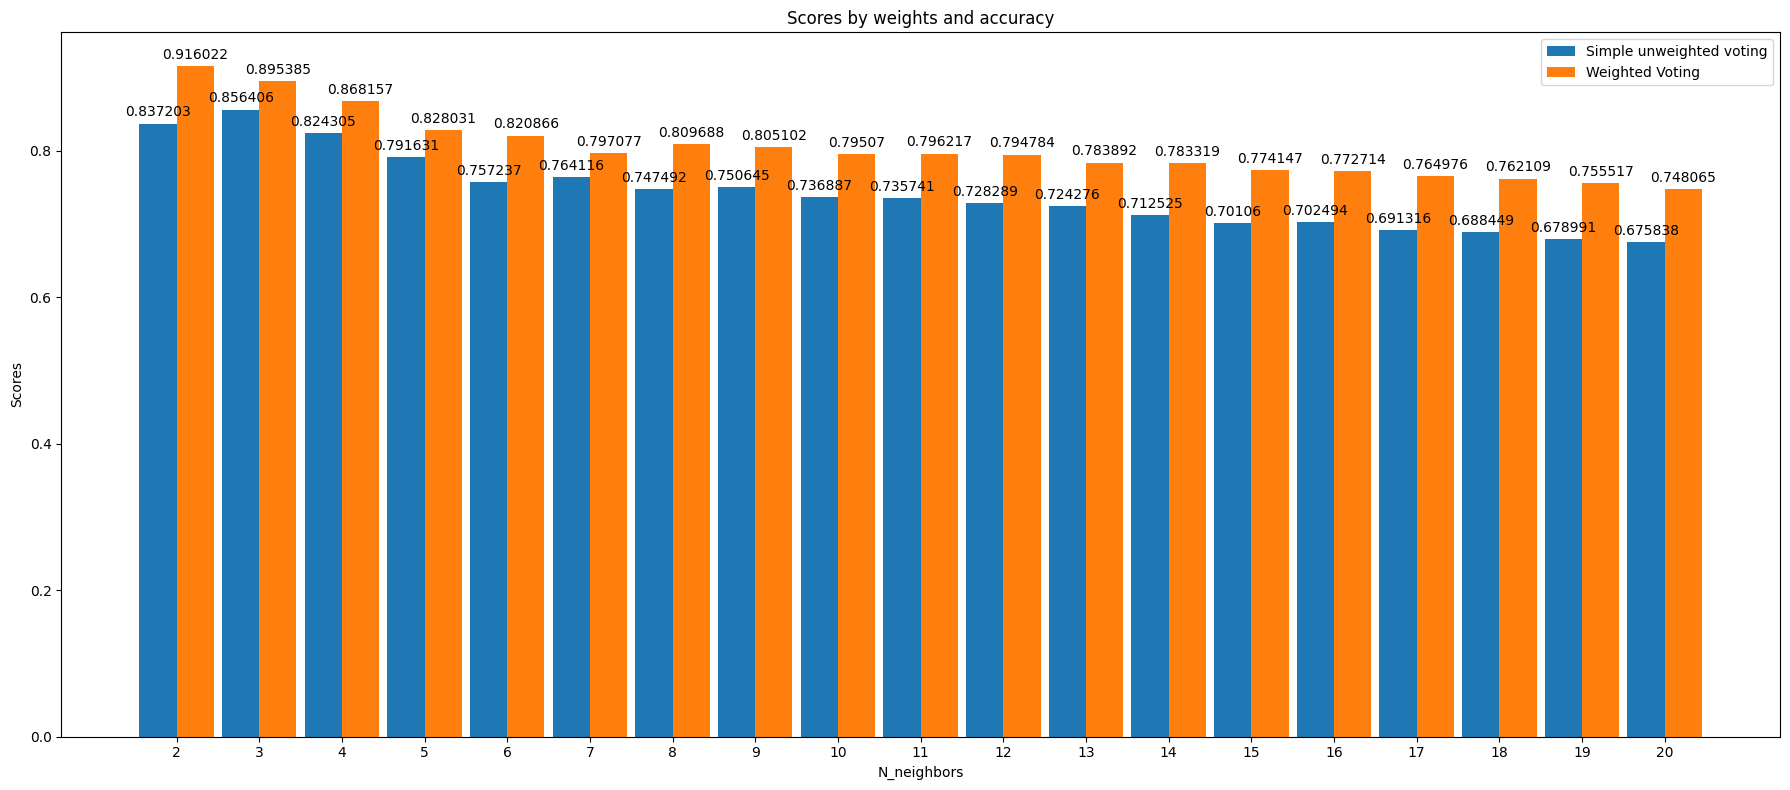

In [19]:
import matplotlib.pyplot as plt
import numpy as np


labels = np.arange(2, 21, 1)
uniform = score[:, 0::2].reshape(-1).tolist()
distance = score[:, 1::2].reshape(-1).tolist()
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars



fig, ax = plt.subplots(figsize=(18,8))
rects1 = ax.bar(x - width/2, uniform, width, label='Simple unweighted voting')
rects2 = ax.bar(x + width/2, distance, width, label='Weighted Voting')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('N_neighbors')
ax.set_ylabel('Scores')
ax.set_title('Scores by weights and accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()